In [1]:
import pandas as pd
import numpy as np
import keras
import os
import matplotlib as plt
import sklearn

Using TensorFlow backend.


In [2]:
train = pd.read_csv("~/Downloads/CAX_MortgageModeling_Train.csv")

In [3]:
train.head(3)

,Unique_ID,MORTGAGE NUMBER,PROPERTY VALUE,MORTGAGE PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE AMOUNT,RATE,...,PROPERTY TYPE,TERM,FSA,AGE RANGE,GENDER,INCOME,INCOME TYPE,NAICS CODE,CREDIT SCORE,RESULT
0,CAX_Train_1,1,900000,5429,61.98,65.00,71.63,360,1040000.0,4.0,...,Single Detached,12,L4C,Under 25,Male,108000,8,44-45,681,FUNDED
1,CAX_Train_2,2,386000,2179,35.22,74.29,40.65,360,390000.0,4.5,...,Single Detached,12,L9T,70 and over,Male,78000,2,56,710,FUNDED
2,CAX_Train_3,3,531000,2152,30.97,80.00,35.41,360,424800.0,3.5,...,Single Detached,6,M1N,35-39,Female,87000,2,72,709,FUNDED


In [3]:
train['RESULT'].value_counts()
# Imbalance Dataset

FUNDED        36023
NOT FUNDED     9619
Name: RESULT, dtype: int64

In [5]:
train.columns

Index(['Unique_ID', 'MORTGAGE NUMBER', 'PROPERTY VALUE', 'MORTGAGE PAYMENT',
       'GDS', 'LTV', 'TDS', 'AMORTIZATION', 'MORTGAGE AMOUNT', 'RATE',
       'MORTGAGE PURPOSE', 'PAYMENT FREQUENCY', 'PROPERTY TYPE', 'TERM', 'FSA',
       'AGE RANGE', 'GENDER', 'INCOME', 'INCOME TYPE', 'NAICS CODE',
       'CREDIT SCORE', 'RESULT'],
      dtype='object')

In [6]:
#Get column names and types
train.dtypes

Unique_ID             object
MORTGAGE NUMBER        int64
PROPERTY VALUE         int64
MORTGAGE PAYMENT       int64
GDS                  float64
LTV                  float64
TDS                  float64
AMORTIZATION           int64
MORTGAGE AMOUNT      float64
RATE                 float64
MORTGAGE PURPOSE      object
PAYMENT FREQUENCY     object
PROPERTY TYPE         object
TERM                   int64
FSA                   object
AGE RANGE             object
GENDER                object
INCOME                 int64
INCOME TYPE            int64
NAICS CODE            object
CREDIT SCORE           int64
RESULT                object
dtype: object

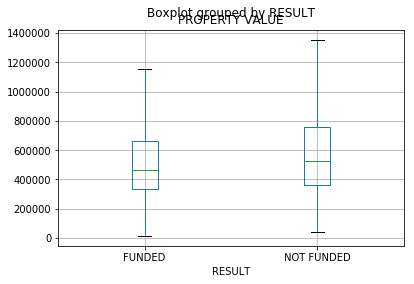

In [8]:
train.boxplot(by= "RESULT",column = ["PROPERTY VALUE"], showfliers=False)
# There is a slight higher chance of not getting funded if the property value is high

In [9]:
train['value_inc_ratio'] = train["PROPERTY VALUE"]/train["INCOME"]

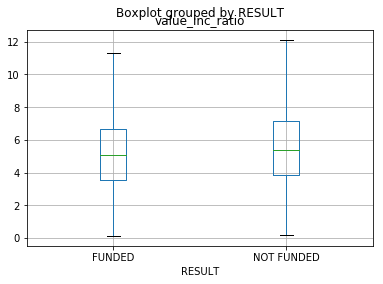

In [10]:
train.boxplot(by = "RESULT", column = ["value_inc_ratio"], showfliers = False)
# Not much of a difference in prop value/inc ratio

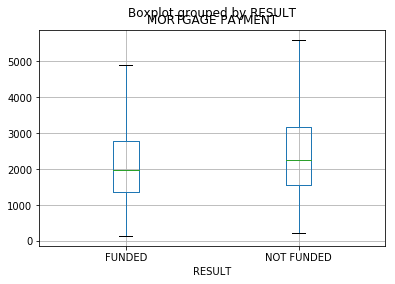

In [11]:
train.boxplot(by = "RESULT", column= ["MORTGAGE PAYMENT"], showfliers = False)

In [12]:
train['DIFFERENCE'] = train["PROPERTY VALUE"] - train["MORTGAGE PAYMENT"]
train['DIFFERENCE INCOME RATIO'] = train["DIFFERENCE"]/train["INCOME"]

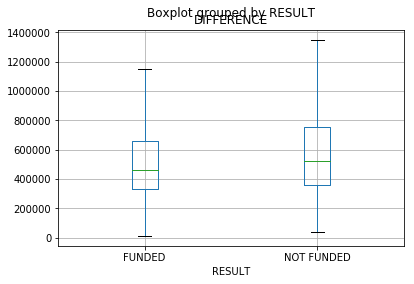

In [13]:
train.boxplot(by="RESULT", column= ["DIFFERENCE"], showfliers = False)

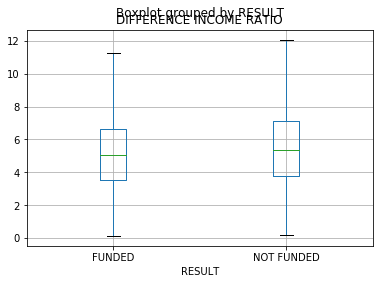

In [14]:
train.boxplot(by="RESULT", column= ["DIFFERENCE INCOME RATIO"], showfliers = False)

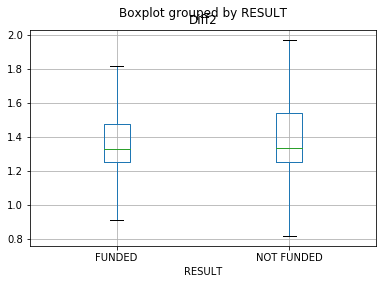

In [15]:
train["Diff2"] = train["PROPERTY VALUE"]/train["MORTGAGE AMOUNT"]
train.boxplot(by="RESULT", column = ["Diff2"], showfliers = False)

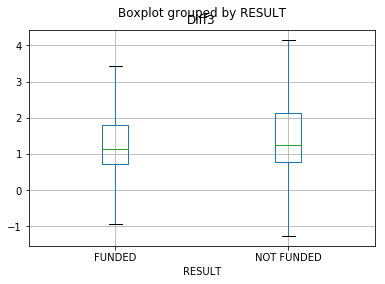

In [16]:
train["Diff3"] = (train["PROPERTY VALUE"]-train["MORTGAGE AMOUNT"])/train["INCOME"]
train.boxplot(by="RESULT", column = ["Diff3"], showfliers = False)

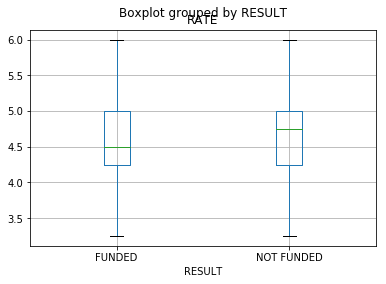

In [17]:
train.boxplot(by="RESULT", column=["RATE"], showfliers = False)

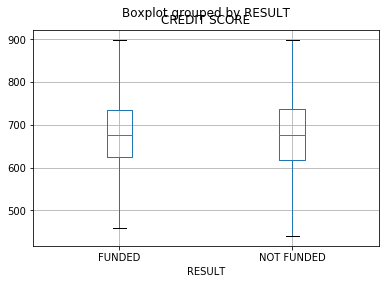

In [18]:
train.boxplot(by="RESULT", column = ["CREDIT SCORE"], showfliers = False)

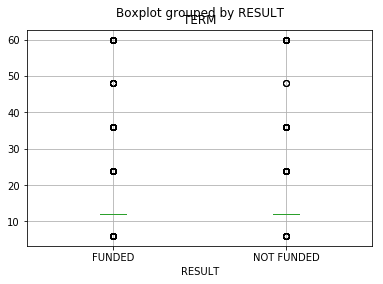

In [21]:
train.boxplot(by="RESULT", column = ["TERM"], showfliers = True)

In [27]:
train.columns

Index(['Unique_ID', 'MORTGAGE NUMBER', 'PROPERTY VALUE', 'MORTGAGE PAYMENT',
       'GDS', 'LTV', 'TDS', 'AMORTIZATION', 'MORTGAGE AMOUNT', 'RATE',
       'MORTGAGE PURPOSE', 'PAYMENT FREQUENCY', 'PROPERTY TYPE', 'TERM', 'FSA',
       'AGE RANGE', 'GENDER', 'INCOME', 'INCOME TYPE', 'NAICS CODE',
       'CREDIT SCORE', 'RESULT', 'value_inc_ratio', 'DIFFERENCE',
       'DIFFERENCE INCOME RATIO', 'Diff2', 'Diff3'],
      dtype='object')

In [31]:
crosstab = pd.crosstab(train["RESULT"], train['MORTGAGE PURPOSE'])
crosstab

MORTGAGE PURPOSE,Purchase,Refinance
RESULT,,
FUNDED,20216,15807
NOT FUNDED,4203,5416


In [36]:
purchase = 4203/(4203+20216)*100
refinance = 5416/(15807+5416)*100

print('Rejection rates',purchase, refinance)
# Purchase has a lower rejection rate as opposed to refinance

Rejection rates 17.212007043695483 25.519483579135844


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
train.columns

Index(['Unique_ID', 'MORTGAGE NUMBER', 'PROPERTY VALUE', 'MORTGAGE PAYMENT',
       'GDS', 'LTV', 'TDS', 'AMORTIZATION', 'MORTGAGE AMOUNT', 'RATE',
       'MORTGAGE PURPOSE', 'PAYMENT FREQUENCY', 'PROPERTY TYPE', 'TERM', 'FSA',
       'AGE RANGE', 'GENDER', 'INCOME', 'INCOME TYPE', 'NAICS CODE',
       'CREDIT SCORE', 'RESULT', 'value_inc_ratio', 'DIFFERENCE',
       'DIFFERENCE INCOME RATIO', 'Diff2', 'Diff3'],
      dtype='object')

In [48]:
X = 

In [49]:
train.shape

(45642, 27)

TypeError: unhashable type: 'slice'